In [14]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import os
from analisis_resultados import DataAnalyst
import parameters as p
import pickle
%matplotlib inline

# Allow inline jshtml animations
from matplotlib import rc
rc('animation', html='jshtml')

In [24]:
ruta_topografia = "input/ciclo_9/DEM_04.02.2023_10x10m.asc"
ruta_mascara_tranque = p.RUTA_MASK_TRANQUE

OUTPUT_FOLDER = 'output_pruebas_sensibilidad_mallado'
OUTPUT_DEPTH_FOLDER = os.path.join(OUTPUT_FOLDER, "depths")
OUTPUT_STATE_FOLDER = os.path.join(OUTPUT_FOLDER, "states")

ruta_region = os.path.join(OUTPUT_FOLDER, "poligono_sector_5_extendido.csv")
da = DataAnalyst(ruta_topografia, ruta_mascara_tranque, ruta_region)

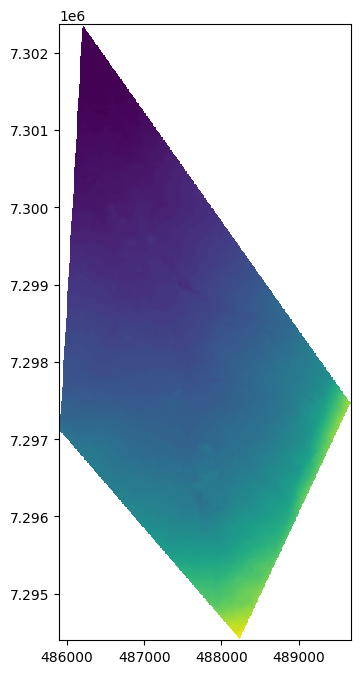

In [16]:
da.graficar_topografia()
plt.show()

In [25]:
with open(f'{OUTPUT_DEPTH_FOLDER}/depth_256_15200.pkl', 'rb') as f:
    depth = pickle.load(f)

with open(f'{OUTPUT_DEPTH_FOLDER}/depth_128_15200.pkl', 'rb') as f:
    depth2 = pickle.load(f)

In [26]:
depths = {'256': depth, '128': depth2}

In [27]:
da.cargar_depths(depths)


In [31]:
da.porcentaje_volumen_contenido('256', '128')

13.142382369188638

In [30]:
da.porcentajes_volumenes_exteriores('256', '128')

(0.15520372167290242, 0.19691065195584345)

In [11]:
mask_d1_nan = np.isnan(d1)
mask_d2_nan = np.isnan(d2)

d1[mask_d1_nan] = 0
d2[mask_d2_nan] = 0

In [12]:
np.sum(np.abs(d1 - d2) * 100)

33465.056760541745

In [28]:
error, depth1 = da.errores_altura('128', '256')

In [29]:
mask_error = ~np.isnan(error)

np.mean(error[mask_error])

0.09981016815960585

In [8]:
error

array([[nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan],
       ...,
       [nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan]])

In [8]:
np.nanmean(error)

0.012860103684336033

In [14]:
mask_depth1 = ~np.isnan(depth1)

np.argmin(depth1[mask_depth1])

996

In [15]:
depth1[mask_depth1][996]

1.190277140437776e-10

In [18]:
np.nanmin(error)

8.090283251441578e-08

In [17]:
error[mask_depth1][996] / depth1[mask_depth1][996] * 100

80736500.12820274

In [8]:
np.nan * np.ones((10, 4))

array([[nan, nan, nan, nan],
       [nan, nan, nan, nan],
       [nan, nan, nan, nan],
       [nan, nan, nan, nan],
       [nan, nan, nan, nan],
       [nan, nan, nan, nan],
       [nan, nan, nan, nan],
       [nan, nan, nan, nan],
       [nan, nan, nan, nan],
       [nan, nan, nan, nan]])

In [12]:
da.porcentaje_volumen_contenido('256', '1024')

37.2084369744948